<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/Session2_TimeSeries_modelAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 1: Using ARIMA model to predict food_retail capital in Australia.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

#import seaborn as sns
#sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/australian_capital_retail.csv')

Task 1:
Aggregate the yearly sum of "food retailing" and visualize it over time.

In [5]:
print(df.columns)

Index(['month', 'cafes_restaurants_and_catering_services',
       'cafes_restaurants_and_takeaway_food_services', 'clothing_retailing',
       'clothing_footwear_and_personal_accessory_retailing',
       'department_stores', 'electrical_and_electronic_goods_retailing',
       'food_retailing', 'footwear_and_other_personal_accessory_retailing',
       'furniture_floor_coverings_houseware_and_textile_goods_retailing',
       'hardware_building_and_garden_supplies_retailing',
       'household_goods_retailing', 'liquor_retailing',
       'newspaper_and_book_retailing', 'other_recreational_goods_retailing',
       'other_retailing', 'other_retailing_n.e.c.',
       'other_specialised_food_retailing',
       'pharmaceutical_cosmetic_and_toiletry_goods_retailing',
       'supermarket_and_grocery_stores', 'takeaway_food_services', 'Month',
       'Year'],
      dtype='object')


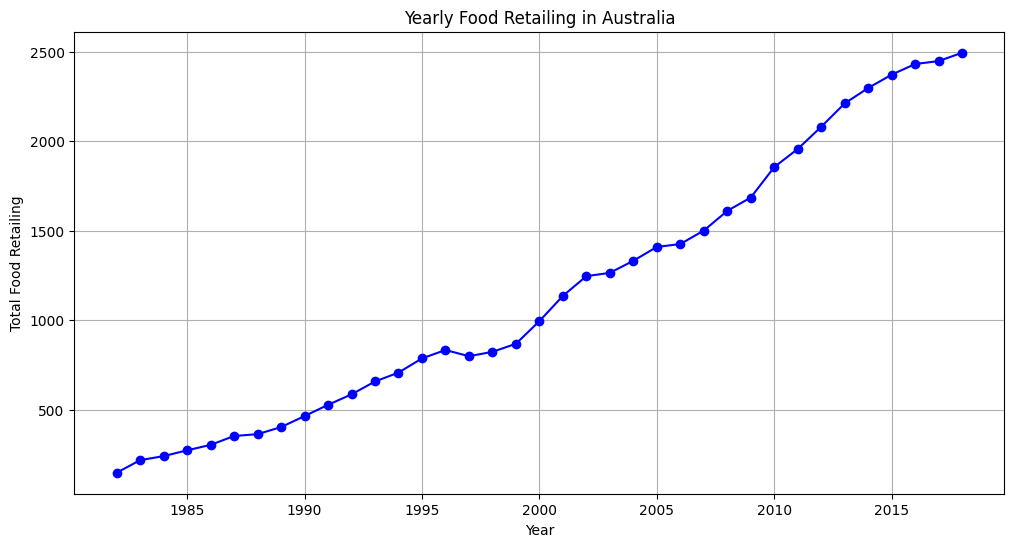

    Year  food_retailing
0   1982           147.8
1   1983           218.0
2   1984           240.6
3   1985           273.1
4   1986           303.3
5   1987           353.0
6   1988           363.2
7   1989           402.8
8   1990           464.1
9   1991           527.1
10  1992           585.5
11  1993           657.5
12  1994           707.1
13  1995           786.4
14  1996           833.3
15  1997           798.7
16  1998           823.0
17  1999           868.1
18  2000           994.6
19  2001          1135.6
20  2002          1245.8
21  2003          1264.3
22  2004          1331.8
23  2005          1409.0
24  2006          1425.3
25  2007          1500.6
26  2008          1610.4
27  2009          1685.1
28  2010          1855.1
29  2011          1956.3
30  2012          2080.3
31  2013          2210.9
32  2014          2297.0
33  2015          2371.5
34  2016          2430.9
35  2017          2447.3
36  2018          2494.0


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/selva86/datasets/master/australian_capital_retail.csv'
df = pd.read_csv(url)
df['month'] = pd.to_datetime(df['month'])
df['Year'] = df['month'].dt.year
yearly_food_retail = df.groupby('Year')['food_retailing'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_food_retail['Year'], yearly_food_retail['food_retailing'], marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Total Food Retailing")
plt.title("Yearly Food Retailing in Australia")
plt.grid(True)
plt.show()
print(yearly_food_retail)

Task 2:
Use the Augmented Dickey–Fuller Test at alpha=0.05 to find out if this timeseries is stationary. If it is not, use the ARIMA framework to locate a proper order of differencing (d) to reach stationarity. Report the Augmented Dickey–Fuller Test once you've succeded.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
url = 'https://raw.githubusercontent.com/selva86/datasets/master/australian_capital_retail.csv'
df = pd.read_csv(url)
df['month'] = pd.to_datetime(df['month'])
df['Year'] = df['month'].dt.year
yearly_food_retail = df.groupby('Year')['food_retailing'].sum().reset_index()

# ------------------------------
# Step 1: Perform ADF Test on Original Data
# ------------------------------

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")

    if result[1] <= 0.05:
        print("\n✅ The time series is stationary (p-value < 0.05).")
    else:
        print("\n❌ The time series is NOT stationary (p-value >= 0.05). Differencing is needed.")

# Perform ADF test on original data
print("🔹 ADF Test on Original Time Series 🔹")
adf_test(yearly_food_retail['food_retailing'])



🔹 ADF Test on Original Time Series 🔹
Augmented Dickey-Fuller Test Results:
ADF Statistic: 2.5483
p-value: 0.9991
Critical Values:
   1%: -3.6791
   5%: -2.9679
   10%: -2.6232

❌ The time series is NOT stationary (p-value >= 0.05). Differencing is needed.


In [9]:
# ------------------------------
# Step 2: Apply Differencing (d) Until Stationary
# ------------------------------
d = 0
diff_series = yearly_food_retail['food_retailing'].copy()

while True:
    adf_result = adfuller(diff_series, autolag='AIC')

    if adf_result[1] < 0.05:  # If p-value < 0.05, series is stationary
        print(f"\n✅ Stationarity achieved after {d} differencing(s)!")
        break

    # Apply first-order differencing
    diff_series = diff_series.diff().dropna()
    d += 1


✅ Stationarity achieved after 1 differencing(s)!



🔹 ADF Test After Differencing (d=1) 🔹
Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.4444
p-value: 0.0095
Critical Values:
   1%: -3.6327
   5%: -2.9485
   10%: -2.6130

✅ The time series is stationary (p-value < 0.05).


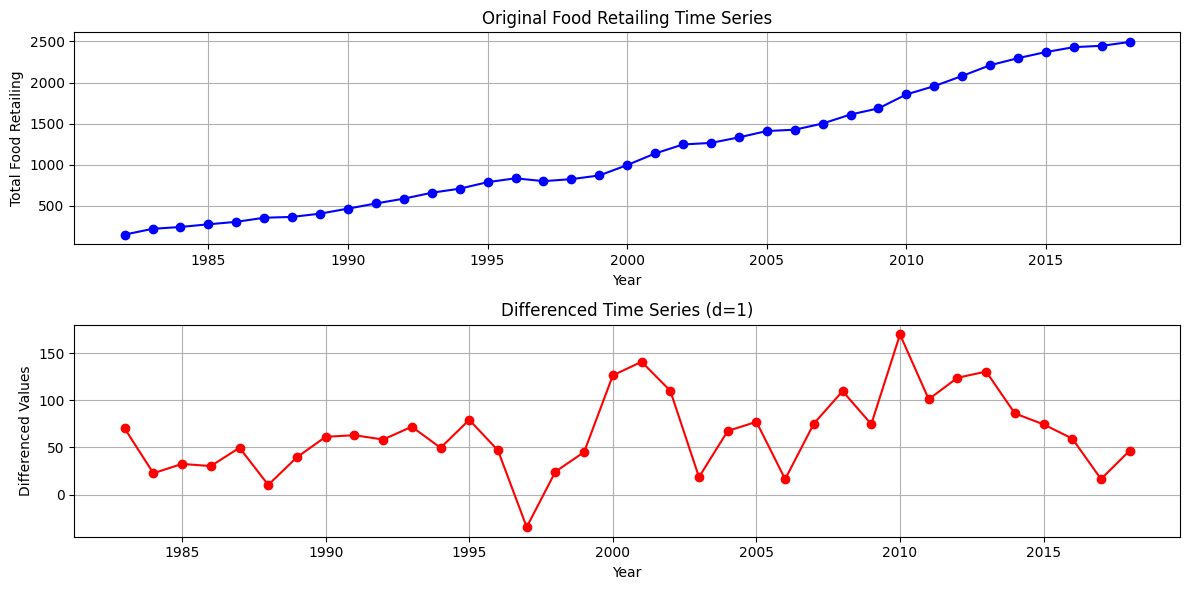


📊 Final Differencing Order (d) for ARIMA: 1


In [10]:
# ------------------------------
# Step 3: Re-run ADF Test on Differenced Data
# ------------------------------
print(f"\n🔹 ADF Test After Differencing (d={d}) 🔹")
adf_test(diff_series)

# ------------------------------
# Step 4: Plot Original vs. Differenced Data
# ------------------------------
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(yearly_food_retail['Year'], yearly_food_retail['food_retailing'], marker='o', linestyle='-', color='blue')
plt.title("Original Food Retailing Time Series")
plt.xlabel("Year")
plt.ylabel("Total Food Retailing")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(yearly_food_retail['Year'][d:], diff_series, marker='o', linestyle='-', color='red')
plt.title(f"Differenced Time Series (d={d})")
plt.xlabel("Year")
plt.ylabel("Differenced Values")
plt.grid()

plt.tight_layout()
plt.show()

# ------------------------------
# Print the Required Differencing Order (d)
# ------------------------------
print(f"\n📊 Final Differencing Order (d) for ARIMA: {d}")

Task 3:
Examine the PACF and ACF plots. What AR and/or MA orders would you choose if any?

✅ Stationarity achieved after 1 differencing(s)!


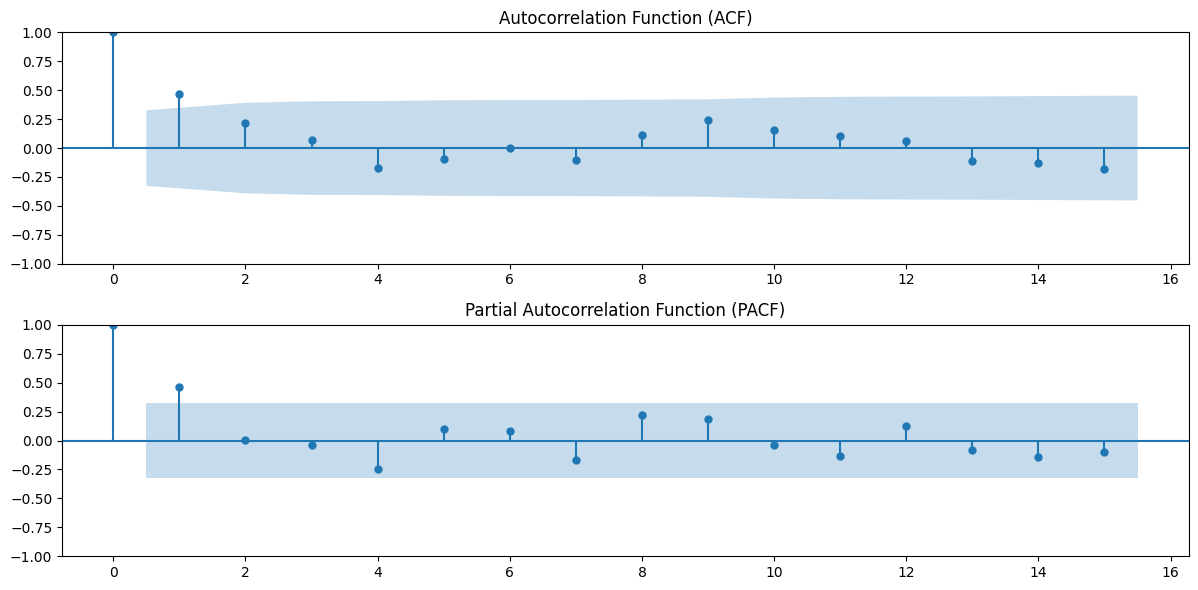

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
url = 'https://raw.githubusercontent.com/selva86/datasets/master/australian_capital_retail.csv'
df = pd.read_csv(url)
df['month'] = pd.to_datetime(df['month'])
df['Year'] = df['month'].dt.year
yearly_food_retail = df.groupby('Year')['food_retailing'].sum().reset_index()

# ------------------------------
# Step 1: Determine Differencing Order (d)
# ------------------------------
d = 0
diff_series = yearly_food_retail['food_retailing'].copy()

while True:
    adf_result = sm.tsa.adfuller(diff_series, autolag='AIC')

    if adf_result[1] < 0.05:  # If p-value < 0.05, series is stationary
        print(f"✅ Stationarity achieved after {d} differencing(s)!")
        break

    # Apply first-order differencing
    diff_series = diff_series.diff().dropna()
    d += 1
# ------------------------------
# Plot ACF & PACF to Determine AR and MA Orders
# ------------------------------
max_lags = min(len(diff_series) // 2, 15)  # Ensure lags < 50% of sample size

#  Adjusted `lags` to be < 50% of sample size
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(diff_series, lags=max_lags, ax=plt.gca())  # ACF for MA order
plt.title("Autocorrelation Function (ACF)")

plt.subplot(2, 1, 2)
plot_pacf(diff_series, lags=max_lags, ax=plt.gca(), method='ywm')  # PACF for AR order
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


Task 4:
Train a model on the first 30 datapoints using an ARIMA(1,1,1) then predict on the last 7 data points (test set). Visalize the result with in-sample and out-of-sample predictions.

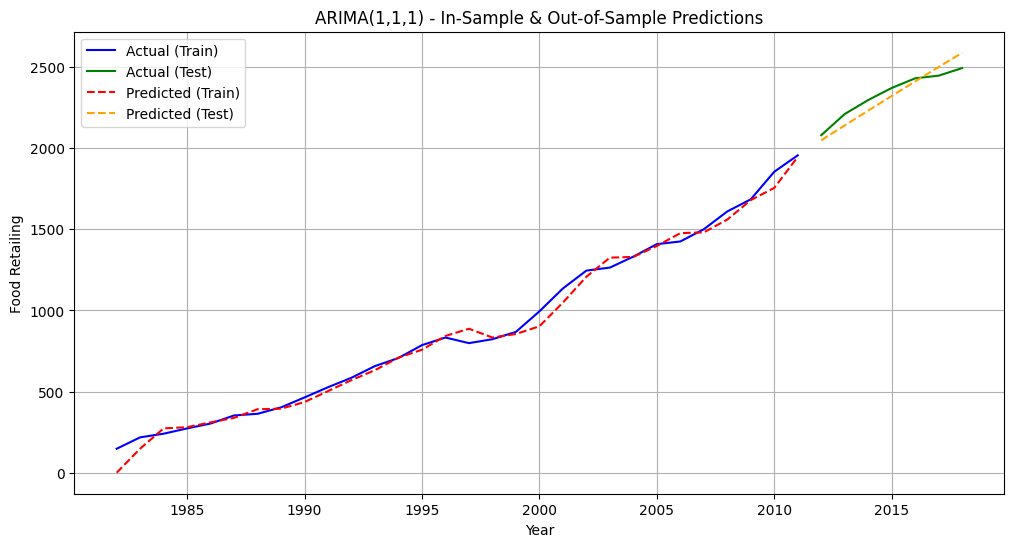

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
url = 'https://raw.githubusercontent.com/selva86/datasets/master/australian_capital_retail.csv'
df = pd.read_csv(url)
df['month'] = pd.to_datetime(df['month'])
df['Year'] = df['month'].dt.year
yearly_food_retail = df.groupby('Year')['food_retailing'].sum().reset_index()


## Step 1

train_size = 30  # First 30 data points for training
train_data = yearly_food_retail.iloc[:train_size]
test_data = yearly_food_retail.iloc[train_size:]

## Step 2
# Define ARIMA model with p=1, d=1, q=1
model = ARIMA(train_data['food_retailing'], order=(1, 1, 1))
fitted_model = model.fit()

## Step 3
# In-Sample Predictions
train_data['predicted'] = fitted_model.fittedvalues

# Out-of-Sample Forecast (Predict next 7 points)
forecast = fitted_model.forecast(steps=len(test_data))
test_data['predicted'] = forecast.values

## Step 4
# Visualization

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(train_data['Year'], train_data['food_retailing'], label="Actual (Train)", color='blue')
plt.plot(test_data['Year'], test_data['food_retailing'], label="Actual (Test)", color='green')

# Plot predictions
plt.plot(train_data['Year'], train_data['predicted'], label="Predicted (Train)", color='red', linestyle='dashed')
plt.plot(test_data['Year'], test_data['predicted'], label="Predicted (Test)", color='orange', linestyle='dashed')

plt.xlabel("Year")
plt.ylabel("Food Retailing")
plt.title("ARIMA(1,1,1) - In-Sample & Out-of-Sample Predictions")
plt.legend()
plt.grid()
plt.show()